In [24]:
"""
Author: JiaHui (Jeffrey) Lu
ID: 25944800
"""
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def my_log1p(x):
    """
    The function takes in x value then uses taylor expansion formula to generate the value for log1p
    :param x: the input to the function log(1+x)
    :return: ans: the result of log1p with input x.
             n: the number of iteration used to obtain a convergent result
             error: the relative error with respect to the inbuilt log1p function in numpy
    """
    n = 2
    ans = x
    while True:
        delta = (((-1)**(n+1))*(x**n))/n
        ans += delta
        if n >= 1000000 or abs(delta) < 0.000001:
            break
        n += 1

    # compute the error
    actual = np.log1p(x)
    error = abs((ans - actual)/actual)

    # Return value as required
    return ans, n, error

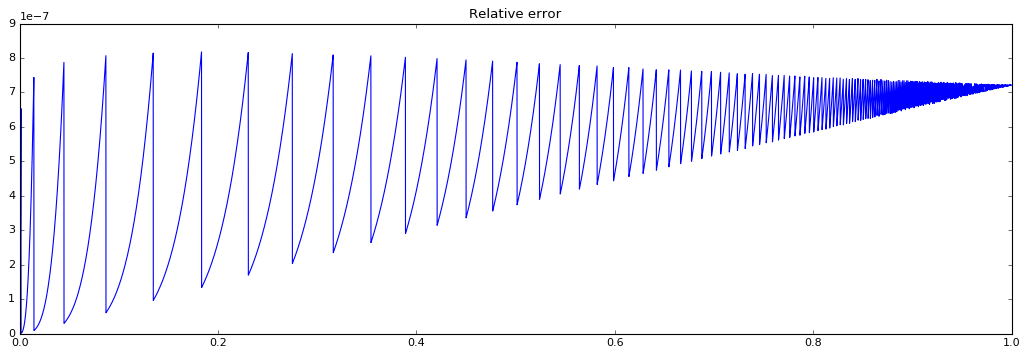

In [27]:
# Generate test values
# Using values that were significantly smaller than machine eps.
small_vals = np.array([2.220446049250313e-50, 2.220446049250313e-16])
# add in values from 0 to 1
tmp = np.linspace(0, 1, 10000)
test_val = np.concatenate([small_vals, tmp[1:]])

result_errors = []
for test_item in test_val:
    _, __, result_error = my_log1p(test_item)
    result_errors.append(result_error)
fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(test_val, result_errors)
plt.title("Relative error")
plt.show()

In [28]:
"""
When the value is smaller than machine epsilon, the conversion from x to y requires the computation of 2+x. Now when x 
is smaller or equal to machine epsilon, the computation of 2+x results in value of 2. This causes a problem, as the y
value will be 0. Consequently, the following calculations requires multiplication involving y, as y = 0, the answer returned
would be 0. Resulting in a 100% relative error.
"""

def my_another_log1p(x):
    y = 1-2/(2+x)
    n = 2
    ans = 2*y
    while True:
        delta = 2*(y**(2*n-1))/(2*n-1)
        ans += delta
        if n >= 1000000 or abs(delta) < 0.000001:
            break
        n += 1
        # print(delta)
    actual = np.log1p(x)
    error = abs((ans - actual)/actual)
    return ans, n, error

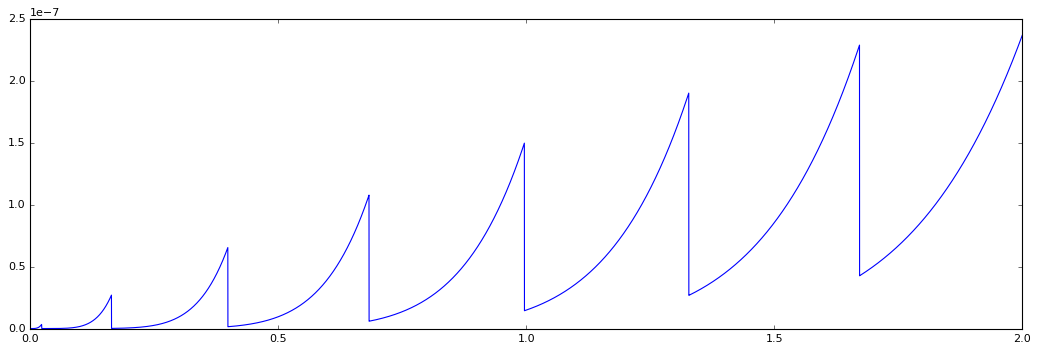

In [29]:
# Generate test values
small_vals = np.array([2.220446049250313e-50, 2.220446049250313e-16])
tmp = np.linspace(0, 2, 10000)
test_val = np.concatenate([small_vals, tmp[1:]])

result_errors = []
for test_item in test_val:
    _, __, result_error = my_another_log1p(test_item)
    result_errors.append(result_error)
# print(result_errors)
fig=plt.figure(figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_val, result_errors)
plt.show()

OverflowError: (34, 'Result too large')